In [1]:
# from utils_torsion_dataset_generator import *
from util_2nd_round_generator import *

RDKit WARNING: [03:36:47] Enabling RDKit 2019.09.3 jupyter extensions
Failed to import the evaluator package.


In [2]:
%%capture cap1 --no-stderr
# Create force field object
forcefield = ForceField('param_valence.offxml', allow_cosmetic_attributes=True)

# Create dictionaries storing molecules and attributes 
parse_input('2nd_round_supplemental_input.smi', output_json='supplemental_2_optimization_inputs.json')
molecules_list_dict, molecule_attributes = read_aggregate_molecules("supplemental_2_optimization_inputs.json")

# List torsion parameters and effective rotations matched to each parameter from input molecule set
tid_list = {'t103', 't104', 't105', 't116', 't145', 't149', 't51b', 't58'}
tid_molecules_list = gen_tid_molecules_list_of_interest(molecule_attributes, molecules_list_dict, forcefield, tid_list)

# Read pickle file containing data downloaded from qcarchive for reuse
gen2_torsiondrive_data = download_torsiondrive_data('OpenFF Gen 2 Torsion Set 6 supplemental', output_pickle='supplemental_gen2_torsiondrive_data.pickle')
# List up pre-calculated torsions for re-use
gen2_tid_calculated_molecules_list, gen2_molecules_list_dict_from_td = gen_tid_calculated_molecules_list(gen2_torsiondrive_data, forcefield)   


In [3]:
%%capture cap2 --no-stderr

# clustering each list of molecules and tid_molecules_list -> tid_clusters_list
# output: `tid_clusters_list[tid] = [..., {'cluster_label': N, 'torsions': [...]}, ...] `
tid_clusters_list = gen_tid_clusters_list_mod(tid_molecules_list, fptype=OEFPType_MACCS166)

1
CCN(CC)/N=N\c1c([nH]cn1)[N+](=O)[O-]


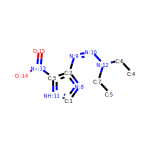

2
CCN(CC)/N=N\c1ccc(cc1)C(=O)O


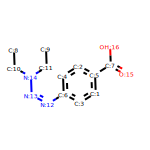

3
CCN(CC)/N=N\c1cccc(c1)NC(=O)C


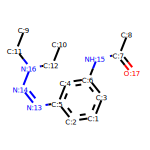

4
CCN(CC)/N=N\c1ccc(cc1)NC(=O)C


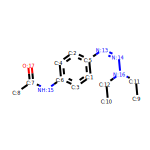

5
CCN(CC)/N=N\c1c2c(cc(nc2[nH]n1)C)C


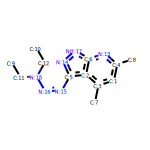

6
CCN(CC)/N=N\c1c-2c(cc([nH]c2nn1)C)C


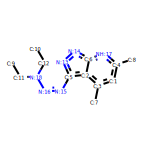

7
CCN(CC)/N=N\c1cccc(c1)/C=C\C(=O)O


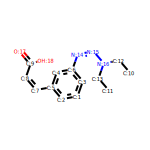

8
CCN(CC)/N=N\c1ccc(cc1)S(=O)(=O)N


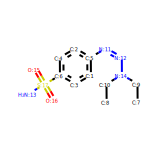

9
CCN(CC)/N=N\c1ccc(cc1)C(=O)[O-]


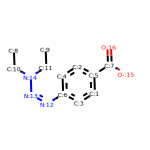

10
CCN(C)N=O


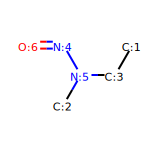

11
CCN(CC)N=O


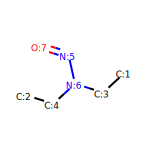

12
CCCN(C)N=O


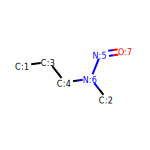

13
CC(=O)CN(C)N=O


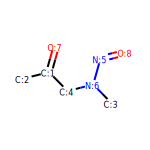

14
CCCCN(C)N=O


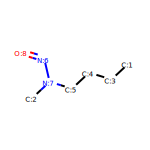

15
CC(C)(C)N(C)N=O


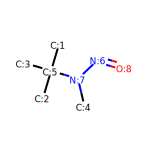

16
CCN(C(C)C)N=O


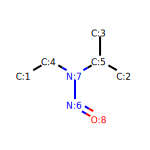

17
CC(C)CN(C)N=O


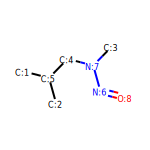

18
CN(CC(=O)O)N=O


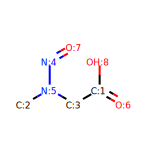

19
CCN(CCO)N=O


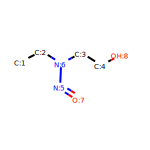

20
C=CCN(CCO)N=O


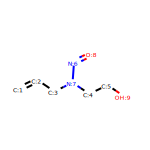

21
CCCN(CCC)N=O


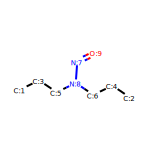

22
CCCCN(CC)N=O


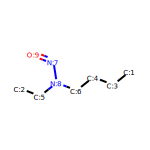

23
CCCCCN(C)N=O


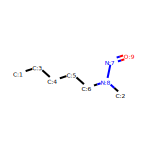

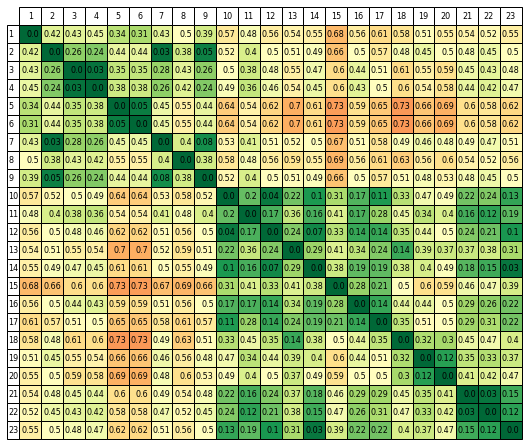

In [10]:
sim_matrix, molecule_list = gen_sim_matrix(tid_molecules_list,tid='t51b', fptype=OEFPType_MACCS166)
for idx, mol_idx in enumerate(molecule_list): 
    print(idx+1)
    print(mol_idx)
    visualize(molecule_attributes, mol_idx)
dis_matrix = convert_sim_matrix(sim_matrix)
draw_table(dis_matrix)

In [5]:
# find if any cluster has pre-calculated torsion and add one more information 'reusable' in the dictionary 
# if 'reusable' == False, no reusable torsion detacted
# tid_clusters_list_detailed[tid] = [ {'cluster_label': N, 'torsions': [...], 'reusable': False or torsion_info}, ...]
tid_clusters_list_detailed = find_reusable_cluster(tid_clusters_list, gen2_tid_calculated_molecules_list)

In [6]:
# Convert linear dependency (data degenracy) into graph representaion
graph_reusable_set, graph_single_coverage_set, graph_multiple_coverage_sets = gen_graph_for_2nd_round(tid_clusters_list_detailed)

In [7]:
# randomized optimization procedure for minimization of data-degeneracy
selected , final_coverage, final_overlap, coverage_history, overlap_history = find_minimum_degeneracy_for_2nd_round(graph_reusable_set, graph_single_coverage_set, graph_multiple_coverage_sets)

In [8]:
%%capture cap3 --no-stderr

selected_rotations, molecules_list_dict_updated = select_rotations_for_2nd_round(tid_clusters_list_detailed, selected, molecules_list_dict,  tid_calculated_molecules_list=None, molecules_list_dict_from_td=None, first_round_tid_calculated_molecules_list=gen2_tid_calculated_molecules_list, first_round_molecules_list_dict_from_td=gen2_molecules_list_dict_from_td)

# Store selected molecules into json file
gen_json_for_2nd_round(selected_rotations, molecule_attributes, molecules_list_dict_updated, output_json='supplemental_2_selected_torsions.json')


In [9]:

with open('select.log', 'w') as f:
    f.write(cap1.stdout)
    f.write(cap2.stdout)
    f.write(cap3.stdout)